In [2]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pylab as plt
import geopandas as gp
from geopandas import GeoDataFrame
import shapely
from shapely.geometry import Point
from fiona.crs import from_epsg

%matplotlib inline

### Importing Census Block Shapefile

In [3]:
shape_path = "HW11_Data/nycb2010.shp" # my PUIdata environmental variable isn't working, need help troubleshooting
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.CT2010
ct_shape.tail()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
CT2010,,,,,,,,
014300,10143001041,1,Manhattan,1041,014300,4.468032e+05,3764.268750,"POLYGON ((990424.1901855469 220439.2438354492,..."
014300,10143001042,1,Manhattan,1042,014300,1.410962e+06,4532.363357,"POLYGON ((991300.5369873047 219724.3143920898,..."
017700,30177001015,3,Brooklyn,1015,017700,5.876303e+05,6679.656578,"POLYGON ((994826.8583984375 177869.5624389648,..."
017700,30177001020,3,Brooklyn,1020,017700,2.493996e+06,20334.551359,"POLYGON ((994315.1588134766 179681.5122070312,..."
027900,10279001000,1,Manhattan,1000,027900,1.304509e+05,1474.194290,"POLYGON ((1002432.593994141 250996.1802368164,..."


### Converting to latitude-longitude

In [4]:
ct_shape.crs = from_epsg(2263) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
ct_latlon = ct_shape.to_crs(epsg=4326)

### Extracting only Brooklyn polygons

In [5]:
ct_bk = ct_latlon[ct_latlon['BoroName'] == 'Brooklyn']

In [6]:
ct_bk.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
CT2010,,,,,,,,
000200,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
000301,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
000501,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
001100,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
001500,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [7]:
len(ct_bk)

9682

### Locating CUSP in a polygon

In [8]:
# I found CUSP's lat-lon coordinates using Google Maps.

CUSP = Point(-73.9885917, 40.6932169) #longitude, latitude - I had to look at Tashay Green's notebook to figure out
    # they're inputted in this order, not lat then lon. Also borrowed next line from her (though it's kind of obvious).

In [9]:
# The index we're looking for is Census Tract 001100.
ct_bk[ct_bk.geometry.intersects(CUSP)]

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
CT2010,,,,,,,,
001100,30011001002,3,Brooklyn,1002,001100,462604.348339,2917.605512,POLYGON ((-73.98716132813911 40.69496169586319...


### Plot

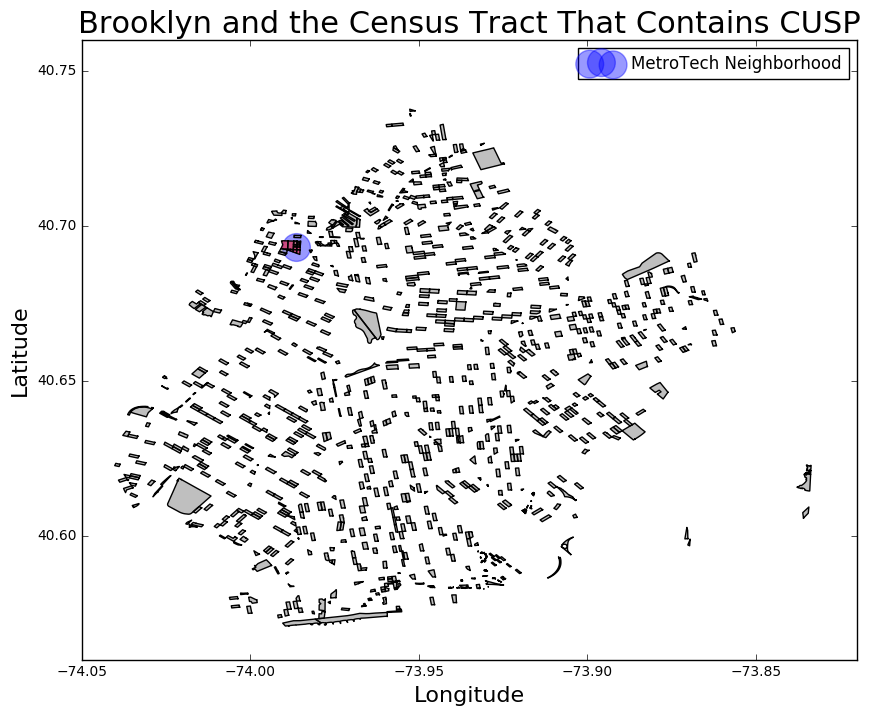

In [12]:
f, ax = plt.subplots(figsize=(10,8))
#when I add a label, the following screws up
ct_bk[ct_bk.CT2010 == '001100'].plot(column = 'CT2010', ax = ax, color = 'red')
ct_bk.iloc[np.arange(0, len(ct_bk), 10),:].plot(ax = ax, column = 'BoroName', color = 'gray')
ax.scatter(-73.986403, 40.693217, s = 400, color ='blue', alpha=0.4, label='MetroTech Neighborhood')
ax.set_xlim(-74.05, -73.82)
ax.set_ylim(40.56, 40.76)
ax.legend(loc = 'best', fontsize=12)
ax.set_title('Brooklyn and the Census Tract That Contains CUSP', fontsize = 22)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)